In [1]:
   ## Cab Data analysis and Model Preparation

 #importing all important libraries              
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
## Data Reading and analysis
cab_data=pd.read_csv("cab_rides.csv")
cab_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [5]:
weather_Data=pd.read_csv("weather.csv")
weather_Data

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [6]:
 ## Data Analysis ##
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [8]:
weather_Data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [9]:
##  date is converted into proper format ##
import datetime

In [10]:
cab_data['datetime']=pd.to_datetime(cab_data['time_stamp'])
cab_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223
...,...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1970-01-01 00:25:43.708385534
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1970-01-01 00:25:43.708385534
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,1970-01-01 00:25:43.708385534
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1970-01-01 00:25:43.708385534


In [11]:
weather_Data['datetime']=pd.to_datetime(weather_Data['time_stamp'])
weather_Data

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,datetime
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25,1970-01-01 00:00:01.545003901
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,1970-01-01 00:00:01.545003901
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,1970-01-01 00:00:01.545003901
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,1970-01-01 00:00:01.545003901
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,1970-01-01 00:00:01.545003901
...,...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52,1970-01-01 00:00:01.543819974
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54,1970-01-01 00:00:01.543819974
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54,1970-01-01 00:00:01.543819974
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54,1970-01-01 00:00:01.543819974


In [12]:
cab_data.shape

(693071, 11)

In [13]:
weather_Data.shape

(6276, 9)

In [14]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [15]:
weather_Data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [16]:
## Concatenation of two data set 
a=pd.concat([cab_data,weather_Data])

In [17]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
a['day']=a.datetime.dt.day
a['hour']=a.datetime.dt.hour

In [21]:
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
6271,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.72,North Station,0.89,1000.69,NaN,0.96,1.52,1,0
6272,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.85,Northeastern University,0.88,1000.71,NaN,0.96,1.54,1,0
6273,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.82,South Station,0.89,1000.70,NaN,0.96,1.54,1,0
6274,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.78,Theatre District,0.89,1000.70,NaN,0.96,1.54,1,0
6275,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.69,West End,0.89,1000.70,NaN,0.96,1.52,1,0


In [23]:
 ## Dealing with missing data 

a.fillna(0,inplace=True)
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0


In [25]:
a.groupby('cab_type').count()   ## cab is grouped by their type ##

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
cab_type,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


<AxesSubplot:xlabel='cab_type'>

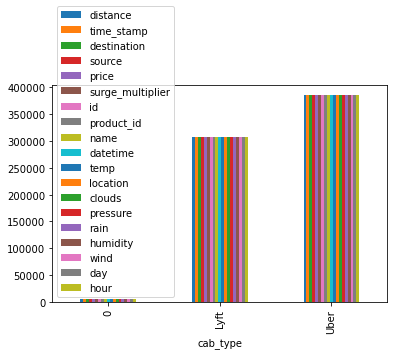

In [24]:
a.groupby('cab_type').count().plot.bar()

<AxesSubplot:>

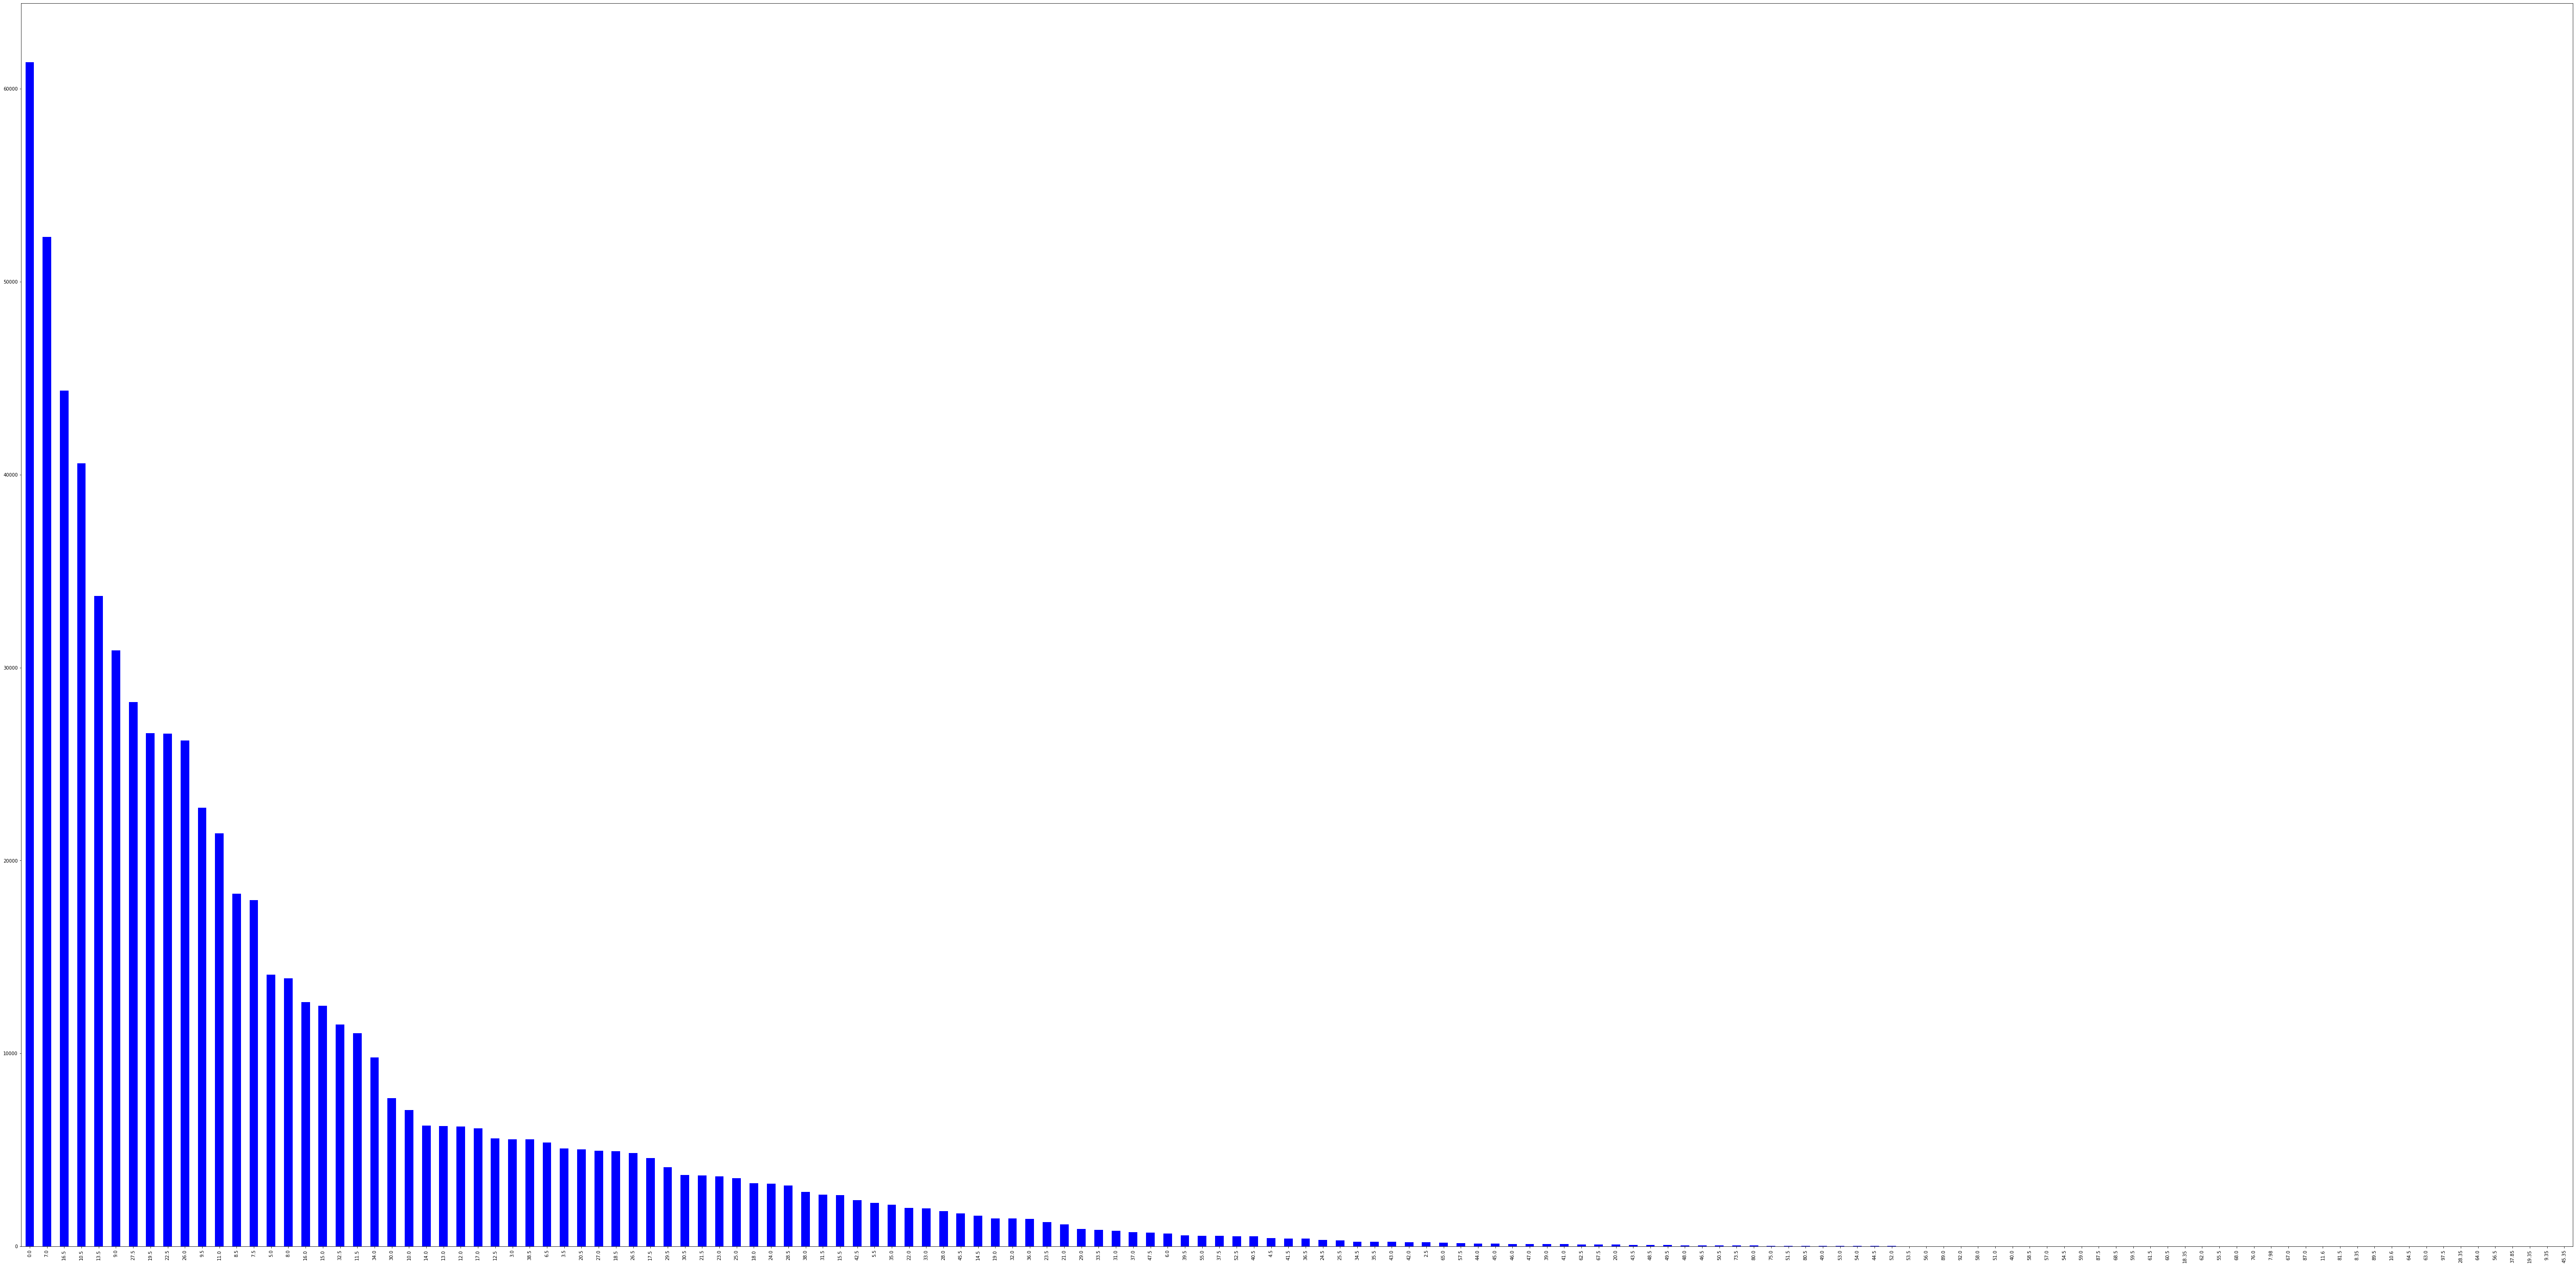

In [26]:
a['price'].value_counts().plot(kind='bar',figsize=(100,50),color='blue')

<AxesSubplot:>

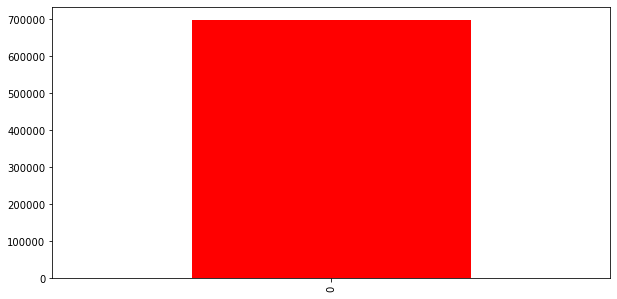

In [27]:
a['hour'].value_counts().plot(kind='bar',figsize=(10,5),color='red')

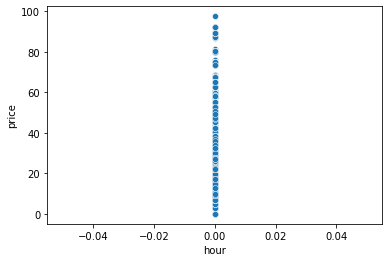

In [32]:
sns.scatterplot(x='hour',y='price', data=a);

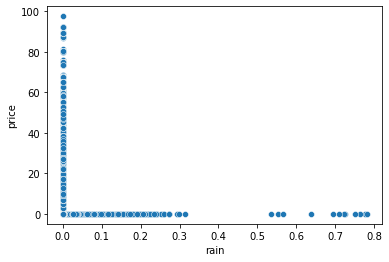

In [33]:
sns.scatterplot(x='rain',y='price', data=a);

In [42]:
## model Preparation
#Separation of Features(X) 0r independent variable and Labels (Y) or dependent Variable

X=a[['distance','temp','pressure','humidity','wind','rain','day','hour','surge_multiplier','clouds']]
X

,distance,temp,pressure,humidity,wind,rain,day,hour,surge_multiplier,clouds
0,0.44,0.00,0.00,0.00,0.00,0.0,1,0,1.0,0.00
1,0.44,0.00,0.00,0.00,0.00,0.0,1,0,1.0,0.00
2,0.44,0.00,0.00,0.00,0.00,0.0,1,0,1.0,0.00
3,0.44,0.00,0.00,0.00,0.00,0.0,1,0,1.0,0.00
4,0.44,0.00,0.00,0.00,0.00,0.0,1,0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...
6271,0.00,44.72,1000.69,0.96,1.52,0.0,1,0,0.0,0.89
6272,0.00,44.85,1000.71,0.96,1.54,0.0,1,0,0.0,0.88
6273,0.00,44.82,1000.70,0.96,1.54,0.0,1,0,0.0,0.89
6274,0.00,44.78,1000.70,0.96,1.54,0.0,1,0,0.0,0.89


In [35]:
y=a['price']

In [43]:
y

0        5.0
1       11.0
2        7.0
3       26.0
4        9.0
        ... 
6271     0.0
6272     0.0
6273     0.0
6274     0.0
6275     0.0
Name: price, Length: 699347, dtype: float64

In [44]:
#splitting of data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train

,distance,temp,pressure,humidity,wind,rain,day,hour,surge_multiplier,clouds
230808,0.91,0.0,0.0,0.0,0.0,0.0,1,0,1.0,0.0
221130,1.40,0.0,0.0,0.0,0.0,0.0,1,0,1.0,0.0
9355,0.60,0.0,0.0,0.0,0.0,0.0,1,0,1.0,0.0
613004,4.55,0.0,0.0,0.0,0.0,0.0,1,0,1.0,0.0
299924,1.98,0.0,0.0,0.0,0.0,0.0,1,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
259178,4.40,0.0,0.0,0.0,0.0,0.0,1,0,1.0,0.0
365838,0.91,0.0,0.0,0.0,0.0,0.0,1,0,1.0,0.0
131932,0.65,0.0,0.0,0.0,0.0,0.0,1,0,1.0,0.0
671155,3.08,0.0,0.0,0.0,0.0,0.0,1,0,1.0,0.0


In [45]:
# creation of Model
# I am taking linear model Here and will analyse how much it is valid model for this dataset
from sklearn.linear_model import LinearRegression

In [46]:
model=LinearRegression() 

In [47]:
#passing train data to model
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# predict labels for test data
test_predictions=model.predict(X_test)
test_predictions                              ## predicted value for labels for test features 

array([32.55803036, 14.75760321, 16.81807092, ..., 29.91249157,
       17.04701178, 20.81181697])

In [49]:
df=pd.DataFrame({'Actual':y_test ,'prediction': test_predictions})
df

,Actual,prediction
81607,42.5,32.558030
354,0.0,14.757603
471801,32.5,16.818071
407645,27.5,10.484041
474760,27.5,10.560354
...,...,...
232224,32.0,17.504893
356717,16.5,17.301391
210753,19.5,29.912492
416766,0.0,17.047012


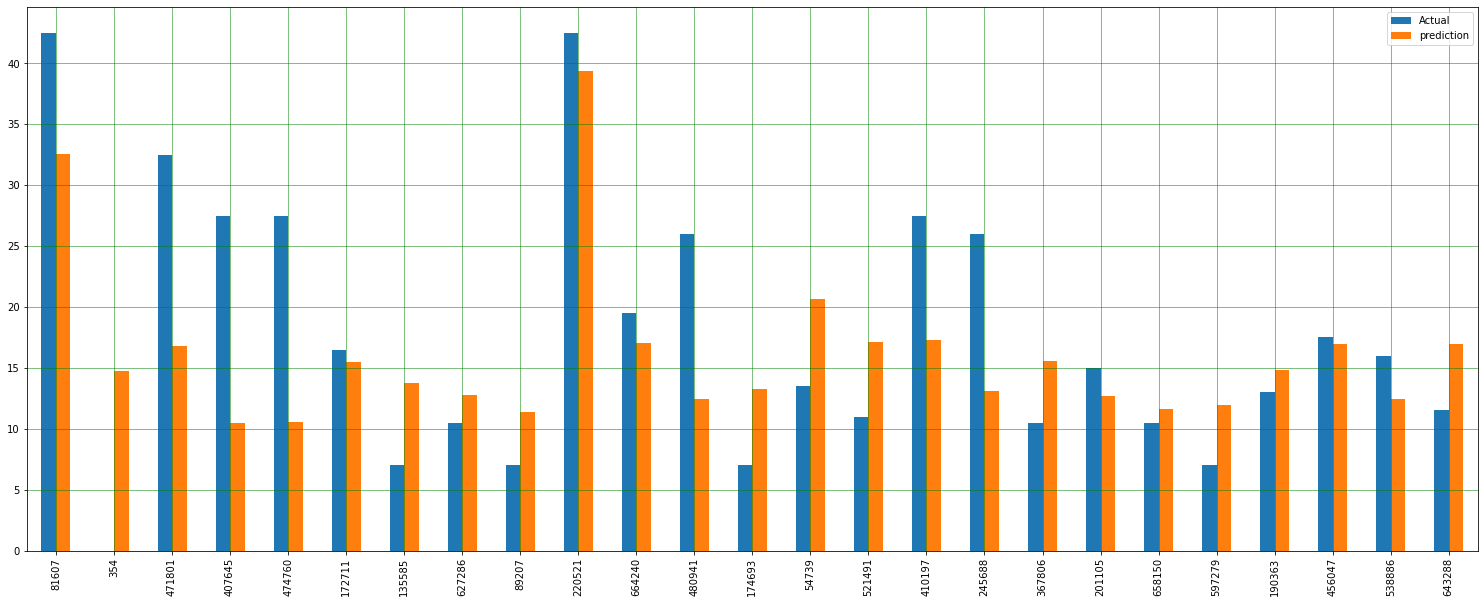

In [50]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
mean_absolute_error(y_test, test_predictions)

7.40219497035647

In [53]:
np.sqrt(mean_squared_error(y_test, test_predictions))

9.231729441858942